In [25]:
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer as simp
from sklearn.model_selection import train_test_split as tts
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from yellowbrick.model_selection import ValidationCurve as VC
import numpy as np

In [26]:
boston_data = pd.read_csv('../data/cleaned/fy2023-property-assessment-data-cleaned.csv')
#boston_data.isna().sum()
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180627 entries, 0 to 180626
Data columns (total 60 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PID                 180627 non-null  int64  
 1   CM_ID               91160 non-null   float64
 2   GIS_ID              180627 non-null  int64  
 3   ST_NUM              171096 non-null  float64
 4   ST_NAME             180627 non-null  object 
 5   UNIT_NUM            80672 non-null   object 
 6   CITY                180622 non-null  object 
 7   ZIP_CODE            180624 non-null  float64
 8   BLDG_SEQ            180626 non-null  float64
 9   NUM_BLDGS           180627 non-null  int64  
 10  LUC                 180627 non-null  int64  
 11  LU                  180627 non-null  object 
 12  LU_DESC             180627 non-null  object 
 13  BLDG_TYPE           178101 non-null  object 
 14  OWN_OCC             180627 non-null  object 
 15  OWNER               180627 non-nul

In [27]:
#This is the create classes for dec_tree
#land_value+building_value=total_value
#gross_tax is also really easy to get total_value
b_max = boston_data['TOTAL_VALUE'].max()
print(b_max)
segments = pd.IntervalIndex.from_tuples([(0,333333),(333334,666666),(666667,999999),(1000000,5000000),(5000001,b_max+1)])
boston_data['segment_cost'] = pd.cut(boston_data['TOTAL_VALUE'], [0,350000,550000,700000,1000000,b_max+1], labels=['a','b','c','d','e'], ordered = False)
boston_data['segment_cost'].head()
boston_data.segment_cost.value_counts()

2143052600


e    38054
b    37118
d    35532
a    30465
c    28910
Name: segment_cost, dtype: int64

In [10]:
#Preprocessing features
le = preprocessing.LabelEncoder()
boston_data['ROOF_STRUCTURE'] = le.fit_transform(boston_data['ROOF_STRUCTURE'])
boston_data['ROOF_COVER'] = le.fit_transform(boston_data['ROOF_COVER'])
boston_data['INT_WALL'] = le.fit_transform(boston_data['INT_WALL'])
boston_data['EXT_FNISHED'] = le.fit_transform(boston_data['EXT_FNISHED'])
boston_data['INT_COND'] = le.fit_transform(boston_data['INT_COND'])
boston_data['EXT_COND'] = le.fit_transform(boston_data['EXT_COND'])
boston_data['OVERALL_COND'] = le.fit_transform(boston_data['OVERALL_COND'])
boston_data['ST_NAME'] = le.fit_transform(boston_data['ST_NAME'])
boston_data['CITY'] = le.fit_transform(boston_data['CITY'])
boston_data['OWNER MAIL ADDRESS'] = le.fit_transform(boston_data['OWNER MAIL ADDRESS'])
boston_data['LU'] = le.fit_transform(boston_data['LU'])
boston_data['LU_DESC'] = le.fit_transform(boston_data['LU_DESC'])
boston_data['BLDG_TYPE'] = le.fit_transform(boston_data['BLDG_TYPE'])
boston_data['OWN_OCC'] = le.fit_transform(boston_data['OWN_OCC'])
boston_data['KITCHEN_TYPE'] = le.fit_transform(boston_data['KITCHEN_TYPE'])


boston_data['ROOF_STRUCTURE'] = boston_data['ROOF_STRUCTURE'].fillna(0)
boston_data['ROOF_COVER'] = boston_data['ROOF_COVER'].fillna(0)
boston_data['INT_WALL'] = boston_data['INT_WALL'].fillna(0)
boston_data['EXT_FNISHED'] = boston_data['EXT_FNISHED'].fillna(0)
boston_data['INT_COND'] = boston_data['INT_COND'].fillna(0)
boston_data['EXT_COND'] = boston_data['EXT_COND'].fillna(0)
boston_data['OVERALL_COND'] = boston_data['OVERALL_COND'].fillna(0)
boston_data['FIREPLACES'] = boston_data['FIREPLACES'].fillna(0)
boston_data['NUM_PARKING'] = boston_data['NUM_PARKING'].fillna(0)
boston_data['BED_RMS'] = boston_data['BED_RMS'].fillna(0)
boston_data['FULLBTH'] = boston_data['FULL_BTH'].fillna(0)
boston_data['HLF_BTH'] = boston_data['HLF_BTH'].fillna(0)
boston_data['KITCHENS'] = boston_data['KITCHENS'].fillna(0)
boston_data['TT_RMS'] = boston_data['TT_RMS'].fillna(0)
boston_data['YR_BUILT'] = boston_data['YR_BUILT'].fillna(0)
boston_data['YR_REMODEL'] = boston_data['YR_REMODEL'].fillna(0)
boston_data['ZIP_CODE'] = boston_data['ZIP_CODE'].fillna(0)
boston_data['BLDG_SEQ'] = boston_data['BLDG_SEQ'].fillna(0)
boston_data['CITY'] = boston_data['CITY'].fillna(0)
boston_data['OWNER MAIL ADDRESS'] = boston_data['OWNER MAIL ADDRESS'].fillna(0)
boston_data['KITCHEN_TYPE'] = boston_data['KITCHEN_TYPE'].fillna(0)
boston_data['FULL_BTH'] = boston_data['FULL_BTH'].fillna(0)

b = boston_data['LAND_SF'].mean()
b1 = boston_data['GROSS_AREA'].mean()
b2 = boston_data['LIVING_AREA'].mean()
boston_data['LAND_SF'] = boston_data['LAND_SF'].fillna(b)
boston_data['GROSS_AREA'] = boston_data['GROSS_AREA'].fillna(b1)
boston_data['LIVING_AREA'] = boston_data['LIVING_AREA'].fillna(b2)

#THIS IS SKETCHY BUT MISSING Y VALUES
#NEED TO FIGURE OUT WHY MY BUCKETING MISSED 10548 POINTS
boston_data['segment_cost'] = boston_data['segment_cost'].fillna('a')

In [28]:
#Preprocessing features 2
le = preprocessing.LabelEncoder()
boston_data['ROOF_STRUCTURE'] = le.fit_transform(boston_data['ROOF_STRUCTURE'])
boston_data['ROOF_COVER'] = le.fit_transform(boston_data['ROOF_COVER'])
boston_data['INT_WALL'] = le.fit_transform(boston_data['INT_WALL'])
boston_data['EXT_FNISHED'] = le.fit_transform(boston_data['EXT_FNISHED'])
boston_data['INT_COND'] = le.fit_transform(boston_data['INT_COND'])
boston_data['EXT_COND'] = le.fit_transform(boston_data['EXT_COND'])
boston_data['OVERALL_COND'] = le.fit_transform(boston_data['OVERALL_COND'])
boston_data['ST_NAME'] = le.fit_transform(boston_data['ST_NAME'])
boston_data['CITY'] = le.fit_transform(boston_data['CITY'])
boston_data['OWNER MAIL ADDRESS'] = le.fit_transform(boston_data['OWNER MAIL ADDRESS'])
boston_data['LU'] = le.fit_transform(boston_data['LU'])
boston_data['LU_DESC'] = le.fit_transform(boston_data['LU_DESC'])
boston_data['BLDG_TYPE'] = le.fit_transform(boston_data['BLDG_TYPE'])
boston_data['OWN_OCC'] = le.fit_transform(boston_data['OWN_OCC'])
boston_data['KITCHEN_TYPE'] = le.fit_transform(boston_data['KITCHEN_TYPE'])


boston_data['ROOF_STRUCTURE'] = boston_data['ROOF_STRUCTURE'].fillna(-1)
boston_data['ROOF_COVER'] = boston_data['ROOF_COVER'].fillna(-1)
boston_data['INT_WALL'] = boston_data['INT_WALL'].fillna(-1)
boston_data['EXT_FNISHED'] = boston_data['EXT_FNISHED'].fillna(-1)
boston_data['INT_COND'] = boston_data['INT_COND'].fillna(-1)
boston_data['EXT_COND'] = boston_data['EXT_COND'].fillna(-1)
boston_data['OVERALL_COND'] = boston_data['OVERALL_COND'].fillna(-1)
boston_data['FIREPLACES'] = boston_data['FIREPLACES'].fillna(-1)
boston_data['NUM_PARKING'] = boston_data['NUM_PARKING'].fillna(-1)
boston_data['BED_RMS'] = boston_data['BED_RMS'].fillna(-1)
boston_data['FULLBTH'] = boston_data['FULL_BTH'].fillna(-1)
boston_data['HLF_BTH'] = boston_data['HLF_BTH'].fillna(-1)
boston_data['KITCHENS'] = boston_data['KITCHENS'].fillna(-1)
boston_data['TT_RMS'] = boston_data['TT_RMS'].fillna(-1)
boston_data['YR_BUILT'] = boston_data['YR_BUILT'].fillna(-1)
boston_data['YR_REMODEL'] = boston_data['YR_REMODEL'].fillna(-1)
boston_data['ZIP_CODE'] = boston_data['ZIP_CODE'].fillna(-1)
boston_data['BLDG_SEQ'] = boston_data['BLDG_SEQ'].fillna(-1)
boston_data['CITY'] = boston_data['CITY'].fillna(-1)
boston_data['OWNER MAIL ADDRESS'] = boston_data['OWNER MAIL ADDRESS'].fillna(-1)
boston_data['KITCHEN_TYPE'] = boston_data['KITCHEN_TYPE'].fillna(-1)
boston_data['FULL_BTH'] = boston_data['FULL_BTH'].fillna(-1)

b = boston_data['LAND_SF'].mean()
b1 = boston_data['GROSS_AREA'].mean()
b2 = boston_data['LIVING_AREA'].mean()
boston_data['LAND_SF'] = boston_data['LAND_SF'].fillna(-1)
boston_data['GROSS_AREA'] = boston_data['GROSS_AREA'].fillna(-1)
boston_data['LIVING_AREA'] = boston_data['LIVING_AREA'].fillna(-1)

#THIS IS SKETCHY BUT MISSING Y VALUES
#NEED TO FIGURE OUT WHY MY BUCKETING MISSED 10548 POINTS
boston_data['segment_cost'] = boston_data['segment_cost'].fillna('a')

In [29]:
boston_data.corr()['TOTAL_VALUE']

C:\Users\Sean\AppData\Local\Temp\ipykernel_1540\3421899262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  boston_data.corr()['TOTAL_VALUE']


PID                  -0.044242
CM_ID                -0.048677
GIS_ID               -0.044242
ST_NUM                0.004352
ST_NAME              -0.009711
CITY                 -0.050291
ZIP_CODE              0.001759
BLDG_SEQ             -0.000063
NUM_BLDGS             0.220631
LUC                   0.063090
LU                   -0.020917
LU_DESC              -0.037461
BLDG_TYPE            -0.110092
OWN_OCC              -0.042291
OWNER MAIL ADDRESS    0.012818
RES_FLOOR             0.163985
CD_FLOOR              0.404194
RES_UNITS                  NaN
COM_UNITS                  NaN
RC_UNITS                   NaN
LAND_SF               0.174006
GROSS_AREA            0.778252
LIVING_AREA           0.773798
LAND_VALUE            0.817147
BLDG_VALUE            0.971549
TOTAL_VALUE           1.000000
GROSS_TAX             0.658975
YR_BUILT              0.013389
YR_REMODEL            0.031540
ROOF_STRUCTURE        0.093008
ROOF_COVER            0.090498
INT_WALL              0.065364
EXT_FNIS

In [30]:
#Multiclass dec tree construction
X = boston_data[boston_data.columns.drop(['segment_cost', 'OWNER','CM_ID', 'GIS_ID', 'LAND_VALUE', 'TOTAL_VALUE','BLDG_VALUE','GROSS_TAX','ST_NUM','UNIT_NUM','RES_FLOOR',
'CD_FLOOR','RES_UNITS','COM_UNITS','RC_UNITS','STRUCTURE_CLASS','BDRM_COND','BTHRM_STYLE1','BTHRM_STYLE2','BTHRM_STYLE3','KITCHEN_STYLE1','KITCHEN_STYLE2',
'KITCHEN_STYLE3', 'HEAT_TYPE','HEAT_FUEL','AC_TYPE','ORIENTATION','PROP_VIEW','CORNER_UNIT'])]

Y = boston_data['segment_cost']

In [31]:
Y.isna().sum()

0

In [32]:
X_train, X_test, y_train, y_test = tts(X,Y,test_size=.25,random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=17)
clf1 = clf.fit(X_train, y_train)
print('Accuracy on Decision Tree Classifier Test Set: ', clf1.score(X_test, y_test))
#tree.plot_tree(clf1)

Accuracy on Decision Tree Classifier Test Set:  0.7874083752242177


<function matplotlib.pyplot.show(close=None, block=None)>

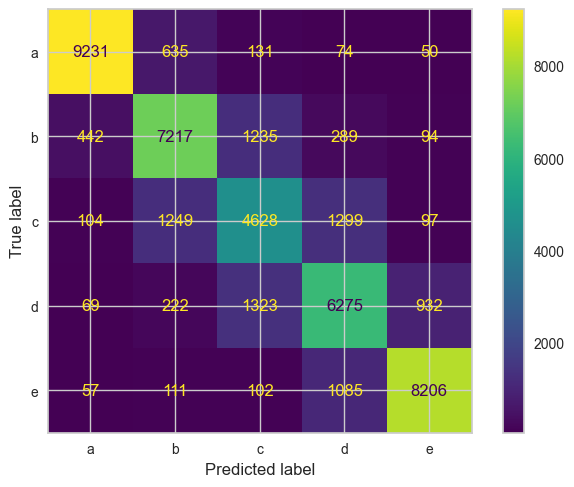

In [33]:
y_pred = clf1.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf1.classes_)
disp.plot()
plt.show

In [34]:
X1 = boston_data[boston_data.columns.drop(['segment_cost', 'OWNER','CM_ID', 'GIS_ID', 'LAND_VALUE', 'TOTAL_VALUE','BLDG_VALUE','GROSS_TAX','ST_NUM','UNIT_NUM','RES_FLOOR',
'CD_FLOOR','RES_UNITS','COM_UNITS','RC_UNITS','STRUCTURE_CLASS','BDRM_COND','BTHRM_STYLE1','BTHRM_STYLE2','BTHRM_STYLE3','KITCHEN_STYLE1','KITCHEN_STYLE2',
'KITCHEN_STYLE3', 'HEAT_TYPE','HEAT_FUEL','AC_TYPE','ORIENTATION','PROP_VIEW','CORNER_UNIT'])]

Y1 = boston_data['TOTAL_VALUE']

In [39]:
X1_train, X1_test, y1_train, y1_test = tts(X1,Y1,test_size=.25,random_state=42)
reg = tree.DecisionTreeRegressor(max_depth=15, random_state=42)
reg1 = reg.fit(X1_train,y1_train)
print('Accuracy on Decision Tree Regression Test Set: ', reg1.score(X1_test,y1_test))

Accuracy on Decision Tree Regression Test Set:  0.6556387008240567


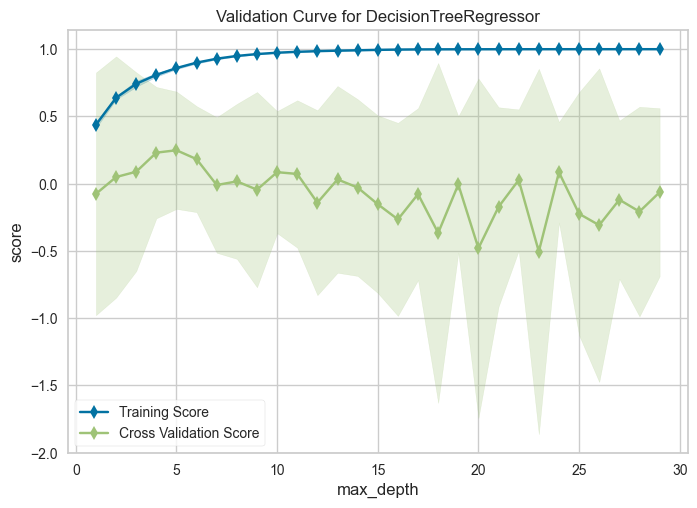

<Axes: title={'center': 'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [37]:
viz = VC(tree.DecisionTreeRegressor(random_state=42), param_name='max_depth', param_range=np.arange(1,30), cv=10, scoring='r2')
viz.fit(X1, Y1)
viz.show()